In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

# 修正したモデルから卒論時に集計したデータを作成する

1. 表

| ベンチマーク名 | 平均誤差率(%) | コスト比(%) |
|---------|----------|---------|


2. 表

| ベンチマーク名 | 採用割合(最大MAPE(%), 最小MAPE(%)) |
|---------|----------------------------|
|         | モデル(1), モデル(2), ...        |


* 平均誤差率：大規模実行時の関数コール回数との比較
* MAPE：トレーニングデータとの比較

<Figure size 288x216 with 0 Axes>

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均誤差率(%)')

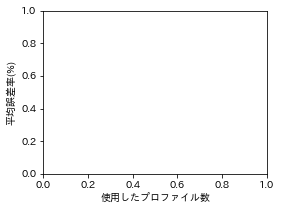

In [2]:
plt.figure(figsize=(4, 3))
plt.xlabel("使用したプロファイル数")
plt.ylabel("平均誤差率(%)")

In [3]:
# pd.get_option("display.max_columns")
# pd.get_option("display.max_rows")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# ベンチマーク名・関数名・プロセス数・問題サイズを指定することで、その条件での関数コール回数を取得する関数

def returnSpecificData(benchmarkName="cg", functionName=".TAU_application", process=256, benchmarkClass="D"):
    targetRawDF = returnRawDF(Benchmark=benchmarkName, functionName=functionName, benchmarkClass=[
                              benchmarkClass], FixedProcess=process, Processes=[process], FixedBenchmarkClass=benchmarkClass)
    return targetRawDF.iat[0, 0]
# returnSpecificData(benchmarkName="mg", functionName="BUBBLE", process=256, benchmarkClass="B")

In [5]:
# benchmarksからbt, spを除外する
benchmarks = [benchmark for benchmark in benchmarks if benchmark !=
              'bt' and benchmark != 'sp']
# pandasのDFをprintした時の幅を広げる
pd.set_option('display.width', 100)

In [6]:
dictTmp = returnDictForPlotPerNumOfUsedData(Benchmark=benchmarks, fix="Class", benchmarkClass=[
    "A", "B", "C", "D"], FixedProcess=64, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="C")

In [7]:
pd.options.display.float_format = '{:.4g}'.format

tmpDF = pd.DataFrame()
for benchmark in benchmarks:
    listToLearn = [1, 2, 4, 8, 16, 32, 64, 128]
    listToPredict = [256]
    benchmark_x = dictTmp[benchmark]["x"]
    benchmark_y = dictTmp[benchmark]["y"]
    index = benchmark_x.index(len(listToLearn))
    MAPE = benchmark_y[index]
    relativeCost = returnRelativeCost(benchmark=benchmark, variablesToLearn=listToLearn,
                                      variablesToPredict=listToPredict, fixedClassOrProcess="Class", fixed="C")
    dictRowData = {"ベンチマーク名": benchmark.upper(
    ), "平均絶対誤差率[％]": MAPE, "相対コスト[％]": relativeCost}
    iDF = pd.DataFrame.from_dict(dictRowData, orient='index').T
    tmpDF = tmpDF.append(iDF)
tmpDFMean = tmpDF.mean()
type(tmpDFMean)
print(tmpDF.to_latex(index=False))

pandas.core.series.Series

\begin{tabular}{lll}
\toprule
ベンチマーク名 & 平均絶対誤差率[％] & 相対コスト[％] \\
\midrule
     CG &      7.984 &    713.8 \\
     EP &          0 &    858.2 \\
     FT &  0.0004566 &    535.8 \\
     IS &  9.382e-07 &    449.2 \\
     LU &      40.65 &    499.4 \\
     MG &      1.061 &    444.7 \\
\bottomrule
\end{tabular}



<Figure size 1144x800 with 0 Axes>

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均絶対誤差率[％]')

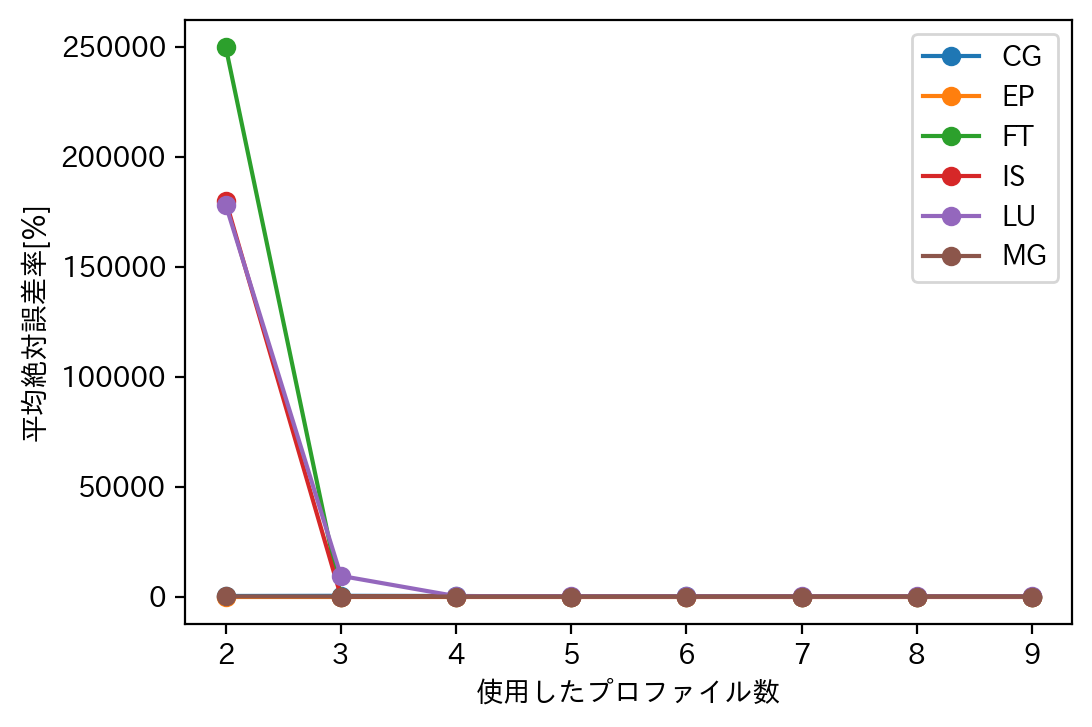

In [8]:
# dictTmp

plt.figure(figsize=(5.72, 4), dpi=200)
for benchmark in list(dictTmp.keys()):
    x = dictTmp[benchmark]["x"]
    y = dictTmp[benchmark]["y"]
    plt.plot(x, y, marker='o', label=benchmark.upper())
    plt.legend()
    plt.xlabel("使用したプロファイル数")
    plt.ylabel("平均絶対誤差率[％]")

<Figure size 1144x800 with 0 Axes>

Text(0, 0.5, '関数コール回数')

Text(0.5, 0, '実行コア数')

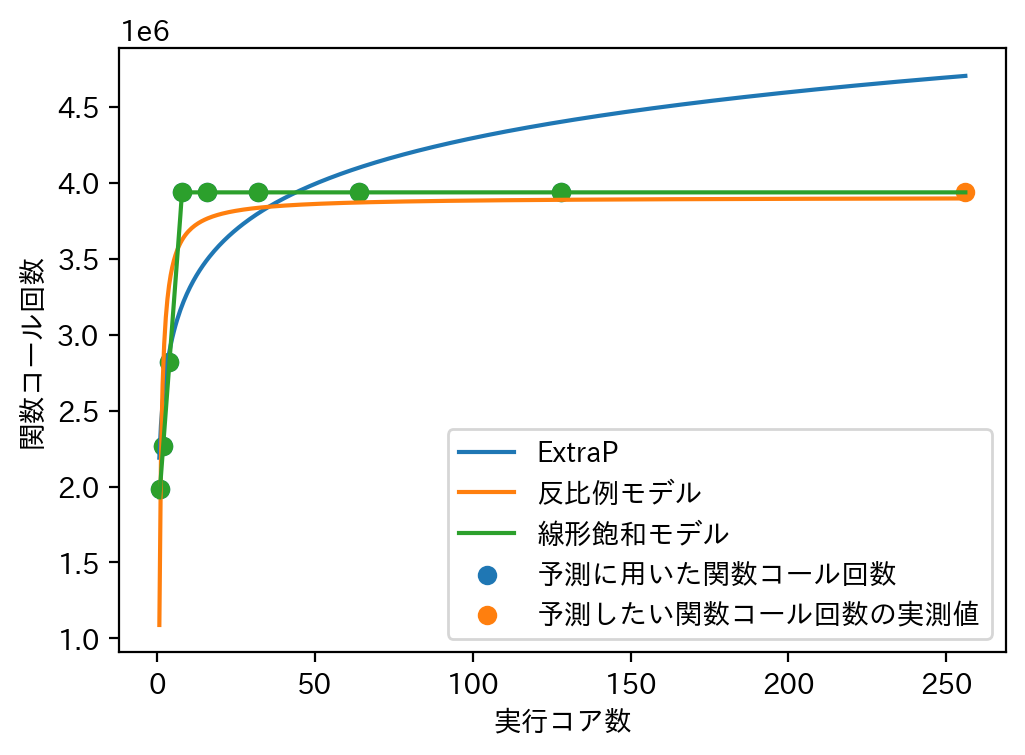

In [9]:
plt.figure(figsize=(5.72, 4), dpi=200)

# Extra-PでfixProcessデータを入力して出力したモデルの図時
plot_x = np.linspace(0.8, 256, 500)
# -3590464.6990329633 + 3759195.349891038 * p^(1/4)
plot_y = []
for x in plot_x:
    plot_y.append(2286768.3333333326 + 301997.61904761934 * math.log2(x)**(1))
plt.plot(plot_x, plot_y, label="ExtraP")

x = [1, 2, 4, 8, 16, 32, 64, 128]
y = [1984770.0, 2263540.0, 2821070.0, 3936140.0,
     3936140.0, 3936140.0, 3936140.0, 3936140.0]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
plt.scatter(x, y, marker="o", label="予測に用いた関数コール回数")
plot_x = np.array(plot_x).reshape(-1, 1)
x_target = [256]
y_target = [3936140]
plt.scatter(x_target, y_target, marker="o", label="予測したい関数コール回数の実測値")

benchmarkName = "CG"
functionName = "ICNVRT"

# 線形モデル
# 対数モデル

# 反比例モデル
modelIpMk2 = ModelIp_mk2(train_x=x, train_y=y, target_x=x_target, target_y=y_target,
                         benchmark_name=benchmarkName, function_name=functionName)
modelIpMk2.calc_lr()
plot_y_IpMk2 = modelIpMk2.predict(plot_x)
plt.plot(plot_x, plot_y_IpMk2, label="反比例モデル")
# 線形飽和モデル
modelBranchMk2 = ModelBranch_mk2(train_x=x, train_y=y, target_x=x_target,
                                 target_y=y_target, benchmark_name=benchmarkName, function_name=functionName)
modelBranchMk2.calc_lr()
plot_y_BranchMk2 = modelBranchMk2.predict(plot_x)
plt.plot(plot_x, plot_y_BranchMk2, label="線形飽和モデル")
# # 線形モデル
# model_lin = ModelLin(x, y, "CG", "ICNVRT", test_ratio=0)
# model_lin.calc_lr()
# plot_y_lin = model_lin.predict(plot_x)
# plt.plot(plot_x, plot_y_lin, label="線形モデル")
# # 対数モデル
# model_log10 = ModelLog10(x, y, "CG", "ICNVRT", test_ratio=0)
# model_log10.calc_lr()
# plot_y_log10 = model_log10.predict(plot_x)
# plt.plot(plot_x, plot_y_log10, label="対数モデル")
# # 反比例モデル
# model_ip = ModelIP(x, y, "CG", "ICNVRT", test_ratio=0)
# model_ip.calc_lr()
# plot_y_ip = model_ip.predict(plot_x)
# plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# # 線形飽和モデル
# model_branch = ModelBranch(x, y, "CG", "ICNVRT", test_ratio=0)
# model_branch.calc_lr()
# plot_y_branch = model_branch.predict(plot_x)
# plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")

plt.scatter(x, y, marker="o")

In [10]:
# 実際にプロットする


# print(f"fix={fix}, benchmarkClasses={benchmarkClasses}, fixedProcess={fixedProcess}, Processes={processes}, FixedBenchmarkClass={fixedBenchmarkClass}")
# print(f"targetNumOfProcess={targetNumOfProcess}, targetProblemSize={fixedBenchmarkClass}, fix={fix}")

# DF = returnRawDFperBenchmark(Benchmark="mg", fix="Process", benchmarkClass=["A", "B", "C", "D"], Processes=[
#                              1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="B", FixedProcess=64)
# DF.dropna(how='any')
# DF

In [11]:
# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

In [12]:
benchmarkNamesExcludeBTSP = ["cg", "ep", "ft", "is", "lu", "mg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"

dfByDatumExcludeBTSP = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesExcludeBTSP, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath)
# dfByDatumExcludeBTSP

dictForLatexTable = {}
numOfData = 0
for benchmarkName in benchmarkNamesExcludeBTSP:
    dictForLatexTable[benchmarkName] = dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName])

numOfData

140

In [13]:


listForDF = []

for benchmarkName in benchmarkNamesExcludeBTSP:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName]))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
benchmarkName &      ModelIp &      ModelLog & ModelBranch &     ModelLin \\
\midrule
           CG &         0(-) & 13(23.0,23.0) & 18(0.0,0.0) &  69(0.0,0.0) \\
           EP &         0(-) &          0(-) &        0(-) & 100(0.0,0.0) \\
           FT &         0(-) &          0(-) & 26(0.0,0.0) & 74(0.0,84.1) \\
           IS &         0(-) & 14(11.5,11.5) &        0(-) & 86(0.0,84.4) \\
           LU & 23(0.0,28.1) &          0(-) &        0(-) &  77(0.0,0.0) \\
           MG &         0(-) &    4(0.5,0.5) &        0(-) &  96(0.0,3.2) \\
\bottomrule
\end{tabular}



In [14]:
test_returnSeriesOfDatumPerBenchmark()

In [15]:
resultIs = dictForLatexTable["is"]
# resultIs
resultIsAtModelBranch = resultIs[resultIs["objectBestModelName"]
                                 == "ModelBranch"]
datumX = resultIsAtModelBranch["usedDataX"].tolist()
datumY = resultIsAtModelBranch["usedDataY"].tolist()

datumX
datumY

# returnSeriesOfData(benchmarkName="is", functionName="double_randlc(double_*_double_*)", rawX=dataX, rawY=dataY, fixProcessOrClass="Class", fixed="B", targetProcess=256, targetBenchmarkClass="B", targetFunctionCallNum=-1, csvDirPath="./csv_files")

[]

[]

In [16]:
resultIs = dictForLatexTable["ft"]
# resultIs
resultIsAtModelBranch = resultIs[resultIs["objectBestModelName"]
                                 == "ModelBranch"]
resultIsAtModelBranchOfNotLowMAPE = resultIsAtModelBranch[
    resultIsAtModelBranch["MAPEOfBestModel"] > 1]
resultIsAtModelBranchOfNotLowMAPE
datumX = resultIsAtModelBranchOfNotLowMAPE["usedDataX"].tolist()
datumY = resultIsAtModelBranchOfNotLowMAPE["usedDataY"].tolist()

datumX
datumY

for dataIndex in range(len(datumX)):
    plt.figure()
    plt.scatter(datumX[dataIndex], datumY[dataIndex])

# returnSeriesOfData(benchmarkName="is", functionName="double_randlc(double_*_double_*)", rawX=dataX, rawY=dataY, fixProcessOrClass="Class", fixed="B", targetProcess=256, targetBenchmarkClass="B", targetFunctionCallNum=-1, csvDirPath="./csv_files")

,benchmarkName,functionName,usedDataX,usedDataY,numOfData,ProcessOrClass,fixed,targetProcess,targetProblemSize,targetNumOfFunctionCall,objectLinModel,MAPEOfLinModel,objectIpModel,MAPEOfIpModel,objectLogModel,MAPEOfLogModel,objectBranchModel,MAPEOfBranchModel,objectBestModelName,MAPEOfBestModel


[]

[]

In [17]:
# 生データの取得
cgDF = returnCollectedExistingData(benchmarkNames=["cg"], classes=["A", "B", "C", "D"], processes=[
                                   1, 2, 4, 8, 16, 32, 64, 128, 256], csvDirPath="./csv_files/")
cgDF
# ベンチマーククラスがAの情報を取得
cgDFfixedA = cgDF[cgDF["benchmarkClass"] == "A"]
cgDFfixedA
# 関数名のリストを取得
functionNames = sorted(list(set(cgDFfixedA["functionName"])))
print(functionNames)

# 関数名を関数名のリストから抽出
functionNameCG = cgDFfixedA[cgDFfixedA["functionName"] == "CG"]
functionNameCG

# 説明変数と目的変数とをリスト化したものを抽出
# プロセス数
raw_x = functionNameCG['process'].tolist()
# 関数コール回数
raw_y = functionNameCG['functionCallNum'].tolist()

print(f"raw_x={raw_x}")
print(f"raw_y={raw_y}")

bencmarkName = "CG"
functionName = "CG"
fixProcessOrClass = "Class"
fixed = "A"
targetProcess = 256
targetBenchmarkClass = fixed
targetFunctionCallNum = raw_y[-1]
returnSeriesOfData(benchmarkName="benhmarkName", functionName="functionName", rawX=[1, 2, 3], rawY=[
                   1, 2, 3], fixProcessOrClass="Class", fixed="B", targetProcess=256, targetBenchmarkClass="B", targetFunctionCallNum=-1, csvDirPath="./csv_files/")

,functionName,functionCallNum,benchmarkName,benchmarkClass,process
0,.TAU_application,1,cg,A,1
1,CG,1,cg,A,1
2,MPI_Finalize(),1,cg,A,1
3,INITIALIZE_MPI,1,cg,A,1
4,MPI_Init(),1,cg,A,1
...,...,...,...,...,...
17,MPI_Reduce(),1,cg,D,256
18,SETUP_SUBMATRIX_INFO,1,cg,D,256
19,MPI_Comm_size(),1,cg,D,256
20,MPI_Comm_rank(),1,cg,D,256


,functionName,functionCallNum,benchmarkName,benchmarkClass,process
0,.TAU_application,1,cg,A,1
1,CG,1,cg,A,1
2,MPI_Finalize(),1,cg,A,1
3,INITIALIZE_MPI,1,cg,A,1
4,MPI_Init(),1,cg,A,1
5,CONJ_GRAD,16,cg,A,1
6,MAKEA,1,cg,A,1
7,MPI_Wait(),2576,cg,A,1
8,SPRNVC,7875,cg,A,1
9,ICNVRT,7.984e+04,cg,A,1


['.TAU_application', 'ALLOC_SPACE', 'CG', 'CONJ_GRAD', 'ICNVRT', 'INITIALIZE_MPI', 'MAKEA', 'MPI_Barrier()', 'MPI_Bcast()', 'MPI_Comm_rank()', 'MPI_Comm_size()', 'MPI_Finalize()', 'MPI_Init()', 'MPI_Irecv()', 'MPI_Reduce()', 'MPI_Send()', 'MPI_Wait()', 'SETUP_PROC_INFO', 'SETUP_SUBMATRIX_INFO', 'SPARSE', 'SPRNVC', 'VECSET']


,functionName,functionCallNum,benchmarkName,benchmarkClass,process
1,CG,1,cg,A,1
1,CG,1,cg,A,2
1,CG,1,cg,A,4
1,CG,1,cg,A,8
1,CG,1,cg,A,16
1,CG,1,cg,A,32
1,CG,1,cg,A,64
1,CG,1,cg,A,128
1,CG,1,cg,A,256


raw_x=[1, 2, 4, 8, 16, 32, 64, 128, 256]
raw_y=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


FileNotFoundError: [Errno 2] No such file or directory: './csv_files//pprof_benhmarkNameB256.csv'

In [ ]:
%reset

In [18]:
# ノートブック中で変数のみを記述することでデータフレームをきれいに表示させる設定の有効化
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 問題サイズD, コア数256での関数コール回数を予測する

In [20]:
# TODO：BT, SP以外のベンチマーク名を入れる
benchmarkNames = ['cg', 'ep', 'ft', 'is', 'lu', 'mg']
classes = ["A", "B", "C", "D"]
processes = [1,2,4,8,16,32,64,128,256]

dictForSummarizedResult = {}
columnName = ["benchmarkName", "functionName", "score"]
dfForSummarizedResult = pd.DataFrame(columns=columnName)
for benchmarkName in benchmarkNames:
    # ベンチマークごとにscoreを保持するためのリスト
    dictForSummarizedResultPerBenchmarkName = []
    # 学習用生データ
    DF = returnCollectedExistingData(benchmarkNames=[benchmarkName], classes=classes, processes=processes, csvDirPath="./csv_files/")
    # 重複のない関数名のリスト
    functionNames = list(set(DF["functionName"]))
    usefulFunctionNames = []
    # このループで関数ごとのデータが問題サイズパターン数xコア数パターン数 分だけ存在する関数名のリストを作成する
    for functionName in functionNames:
        # 関数ごとに生データを集計
        dfPerFunction = DF[DF["functionName"]==functionName]
        if len(classes) * len(processes) == len(dfPerFunction):
            usefulFunctionNames.append(functionName)
    if len(usefulFunctionNames) == 0:
        continue
    ## 関数ごとのデータを抽出
    for functionName in usefulFunctionNames:
        ## 問題サイズを数値化したカラムを追加
        listBenchmarkClass = DF["benchmarkClass"].tolist()
        DFWithNumInBenchmarkClass = DF.assign(benchmarkClassInNum=convertBenchmarkClasses_problemSizeInNPB(listBenchmarkClass))
        ## 学習用データ
        dfPerFunctionForTrain = DFWithNumInBenchmarkClass[(DFWithNumInBenchmarkClass["functionName"] == functionName)]
        dfPerFunctionForTest  = DFWithNumInBenchmarkClass[(DFWithNumInBenchmarkClass["functionName"] == functionName) & (DFWithNumInBenchmarkClass["benchmarkClass"] == "D") & (DFWithNumInBenchmarkClass["process"] == 256)]
    
        ## x:説明変数, t:目的変数
        trainX = dfPerFunctionForTrain[["process", "benchmarkClassInNum"]]
        trainT = dfPerFunctionForTrain[["functionCallNum"]]
        testX  = dfPerFunctionForTest[["process", "benchmarkClassInNum"]]
        testT  = dfPerFunctionForTest[["functionCallNum"]]
        ## 重回帰分析する
        reg_model = LinearRegression()
        reg_model.fit(trainX, trainT)
        ## 関数ごとの結果をベンチマークごとの結果に入れる
        scorePerFunction = reg_model.score(trainX, trainT)
        dictForSummarizedResultPerBenchmarkName.append(scorePerFunction)
        ## 
        dfPerFunction = pd.DataFrame(index=columnName, data=[benchmarkName, functionName, scorePerFunction]).T
        dfForSummarizedResult = dfForSummarizedResult.append(dfPerFunction)
    # 関数ごとの結果を集計して平均をとり、それをベンチマークごとの結果のリストに入れる
    tmpAve = int(sum(dictForSummarizedResultPerBenchmarkName)/len(dictForSummarizedResultPerBenchmarkName) * 100)/100
    dictForSummarizedResult[benchmarkName] = tmpAve
    
print(dictForSummarizedResult)
        
## ( A ~ D ) * (1 ~ 256) のすべての条件を
## 満たしていたら、リストに追加
## 満たしていなければ、なにもしない

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

{'cg': 0.84, 'ep': 1.0, 'is': 1.0, 'lu': 0.71}


In [21]:
tmpResult = pd.DataFrame(dictForSummarizedResult, index=['id', ]).T
tmpResult = tmpResult.reset_index()
tmpResult.columns = ["ベンチマーク名", "決定係数"]
print(tmpResult.to_latex(index=False))

\begin{tabular}{lr}
\toprule
ベンチマーク名 &  決定係数 \\
\midrule
     cg &  0.84 \\
     ep &     1 \\
     is &     1 \\
     lu &  0.71 \\
\bottomrule
\end{tabular}



In [22]:
dfForSummarizedResult

,benchmarkName,functionName,score
0,cg,.TAU_application,1
0,cg,MPI_Init(),1
0,cg,SETUP_SUBMATRIX_INFO,1
0,cg,CG,1
0,cg,VECSET,0.5805
0,cg,MAKEA,1
0,cg,SPRNVC,0.5805
0,cg,MPI_Bcast(),1
0,cg,ALLOC_SPACE,1
0,cg,INITIALIZE_MPI,1


In [23]:
for benchmarkName in benchmarkNames:
    print(dfForSummarizedResult[dfForSummarizedResult["benchmarkName"] == benchmarkName])
    print(dfForSummarizedResult[dfForSummarizedResult["benchmarkName"] == benchmarkName].mean())

  benchmarkName          functionName  score
0            cg      .TAU_application      1
0            cg            MPI_Init()      1
0            cg  SETUP_SUBMATRIX_INFO      1
0            cg                    CG      1
0            cg                VECSET 0.5805
0            cg                 MAKEA      1
0            cg                SPRNVC 0.5805
0            cg           MPI_Bcast()      1
0            cg           ALLOC_SPACE      1
0            cg        INITIALIZE_MPI      1
0            cg          MPI_Reduce()      1
0            cg       MPI_Comm_rank()      1
0            cg            MPI_Send() 0.4998
0            cg                ICNVRT 0.5781
0            cg         MPI_Barrier()      1
0            cg       MPI_Comm_size()      1
0            cg             CONJ_GRAD 0.3582
0            cg       SETUP_PROC_INFO      1
0            cg        MPI_Finalize()      1
0            cg           MPI_Irecv() 0.4998
0            cg            MPI_Wait() 0.4998
0         